Lab02-1
======


###  Context
#### Regression(Linear Regression)
   + Simple regression(단순 회귀분석)
   + Multiple regression(다중 회귀분석)

# Regression ( 회귀 분석 )
+ 어떤 연속적인 값을 갖는 종속 변수(Target, output)가 그 외 다른 독립 변수(input)에 의해 설명된다고 보고, 그 함수 관계를 조사하는 기법입니다.


\- 영향을 받는 변수(Y) : 
<br>반응변수(response variable), __종속변수(dependent variable)__, 결과변수(outcome variable)


\- 영향을 주는 변수(X) : 
<br>설명변수(explanatory variable), __독립변수(independent variable)__, 예측 변수(predictor variable) 

## ! 회귀분석을 실시하기 전에 유의할 점 !

다중 선형 회귀 모형을 예측/추론에 사용하기 위해, 다음의 **네가지 가정** 이 필요합니다.

1. 선형성: 종속변수와 독립변수 간의 선형 관계가 있다.
2. 독립성: 독립변수들 간의 통계적 독립적이다. ( 비다중공선성 )
3. 등분산성: 잔차들의 분산이 일정하다.
4. 정규성: 잔차들의 분포가 정규 분포를 이룬다.

> ### 1. 선형성 (Linearity)
> - 선형성이란, 독립변수와 종속변수 간에 선형적인 관계를 가지는 성질입니다.
>> 선형성이 위반될 경우, 회귀 모형을 사용한 추정이 정확하지 않을 가능성이 큽니다. 다시말해 y와 x간에 선형인 관계가 없다면 아무런 의미 없는 분석이 되기 쉽습니다.

> ### 2. 독립성 (Independency)
> -  독립성은 회귀모형의 가장 빈번한 문제로 제기되는 것으로 다중공선성(Multicollinearity)과 관련되어 있습니다.
>> 독립성이란, 다중 회귀 모형에 투입된 여러 변수들 간에 특정한 관계가 없는 성질을 뜻합니다.  
>> 이 경우 독립성 가정이 위배되고, 회귀 계수의 분산이 비정상적으로 커져 계수 추정이 어려워지는 문제가 생깁니다.

> ### 3. 등분산성(homoskedasticity)
> - 등분산이란, 말 그대로 분산이 같다는 의미입니다. 여기서의 분산은 잔차의 분산을 나타내며 이때 잔차란, 추정치와 실제치의 차이입니다.
>> 잔차가 균일한, 즉 하나의 분산을 가지고 흩어져 있는 성질을 등분산성이라고 합니다.

![1](./Images/Hsked_residual_compare.png)


> 위의 그림은 등분산성을 가정할 수 없는 경우의 잔차도입니다. 반면 아래의 그림은 등분산성을 띤 잔차의 분포를 보여줍니다.  
> 위의 그림의 경우 x의 값이 커질수록 분산이 커지는 현상을 보여줍니다.

![2](./Images/homoskedasticity.jpg)

> ### 4. 정규성(Normality)
> - 잔차의 성규성이란, 잔차가 정규분포의 형태를 띤다는 의미입니다.  
>> 회귀분석에서 알수 없는 잔차의 형태를 최대한 간단하게 두기위해 정규 분포를 따른다는 가정하에 모형을 만들게 됩니다.

![3](./Images/normality.gif)

In [ ]:
##<img src="./Images/Hsked_residual_compare.png" width="300"> 

## Linear regression
+ 회귀 모델이 회귀 계수들의 선형 결합(Linear Relationship)만으로 이루어진 함수임을 말합니다.

### - Linear Relationship
+ ### Hyphothesis(가설공간)

     $Y = B_0 + B_1X_1 + B_2X_2+ \cdot\cdot\cdot B_dX_d$
    ($Y$: Target,  $X_i$ : features,  $d$ : # of features, $B_i$ : model parameters)


+ 회귀 분석을 통해 추정되는 계수의 크기 및 방향석(+,-)를 통해 독립 변수가 종속 변수에 미치는 영향을 알 수 있게 됩니다.
    
### - How to find relationship?

+ ### Least squares method(최소제곱법)<br>

    + 변수 X와 Y의 관계를 가장 잘 나타낸다는 것은 곧 데이터가 나타내는 점들에 가장 가까이 있는 직선을 찾는다는 것입니다. 따라서 이는 곧 모든 점들과의 거리의 합이 최소가 되는 직선을 찾는 것이라고 할 수 있습니다.
    
    $Y: 실제 값 \ \ \hat{Y}: 추정 값(Target)$
    <br>$Y = \hat{Y} + e$
    <br>$e = Y - \hat{Y} : 잔차$(각 데이터와 직선 사이의 거리)
    
    $\sum_{i=1}^n \ {e_i^2}: \ Residual \ Sum \  of \ Squares (RSS)$ 
    ### minRSS = min$\sum_{i=1}^n {e_i^2}$

In [2]:
from os.path import join
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas.plotting import scatter_matrix

# 1. 데이터 살펴보기

+ 이번 실습에서는 당뇨병 환자 데이터<1>와 자동차 데이터<2>를 사용합니다.

### <1> 예제 : 'diabetesDataset.csv'

데이터를 살펴보기 쉽게 csv 파일을 pandas DataFrame으로 읽습니다.

In [3]:
df = pd.read_csv(join('data','diabetesDataset.csv'))
print(df.shape)

(442, 11)


DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [4]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


describe() 메서드는 숫자형 특성의 요약 정보를 줍니다.
<br>count(sample 수), mean(평균), min, max, 

<br>%(백분위수 : 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값)
<br>ex  (__bmi__): 0-25% 구역은  -3.422907e-02보다 작거나 같음, 0-50%는 -7.283770e-03보다 작거나 같음, 75%는 3.564384e-02보다 작거나 같음.

In [5]:
df.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-1.357466e-10,-1.266968e-09,1.583710e-10,-2.262443e-10,2.262443e-11,-1.357466e-10,-6.787330e-11,1.674208e-09,-1.809955e-10,-1.131222e-10,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023070e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729926e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283770e-03,-5.670610e-03,-4.320870e-03,-3.819070e-03,-6.584470e-03,-2.592260e-03,-1.947635e-03,-1.077700e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [6]:
for dim in df.columns:
        df[dim] -= np.min(df[dim])
        df[dim] /= np.max(df[dim])

hist() 메서드는 히스토그램을 줍니다. 히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수(수직축)를 나타냅니다.

In [7]:
df.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436274,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


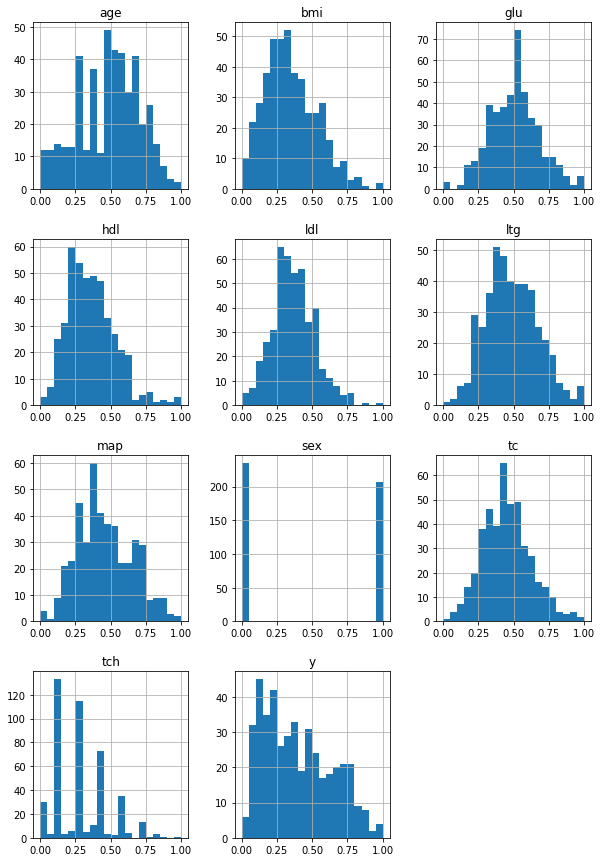

In [8]:
df.hist(bins = 20, figsize=(10, 15))
plt.show()

+ 데이터는 442명의 환자 데이터를 포함하며, 각 환자별로 11개의 특징들을 포함하고 있습니다.


+ Attribute Information:
     - Age
     - Sex
     - Bmi : Body mass index
     - map : Average blood pressure
     - tc, ldl, hdl, tch, ltg, glu : blood serum(혈청) measurements
     - y : a quantitative measure of disease progression one year after baseline

***

### <2> 연습문제 : 'ToyotaDataset.csv'

In [9]:
# 데이터를 살펴보기 쉽게 csv 파일을 pandas DataFrame으로 읽습니다.
# df와는 다른 이름의 변수를 사용합니다. (df2)
df2 = pd.read_csv(join('data','ToyotaDataset.csv'))
print(df2.shape)

(1436, 4)


In [10]:
# DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.
df2.head()

,Price,Age,KM,Weight
0,13500,0.278481,0.193355,0.268293
1,13750,0.278481,0.300149,0.268293
2,13950,0.291139,0.171647,0.268293
3,14950,0.316456,0.197528,0.268293
4,13750,0.367089,0.158433,0.276423


In [11]:
# describe() 메서드는 숫자형 특성의 요약 정보를 줍니다.
df2.describe()

,Price,Age,KM,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,0.695533,0.282027,0.117821
std,3626.964585,0.235443,0.154348,0.085595
min,4350.000000,0.000000,0.000000,0.000000
25%,8450.000000,0.544304,0.176951,0.065041
50%,9900.000000,0.759494,0.260859,0.113821
75%,11950.000000,0.873418,0.358107,0.138211
max,32500.000000,1.000000,1.000000,1.000000


In [12]:
for dim in df2.columns:
        df2[dim] -= np.min(df2[dim])
        df2[dim] /= np.max(df2[dim])

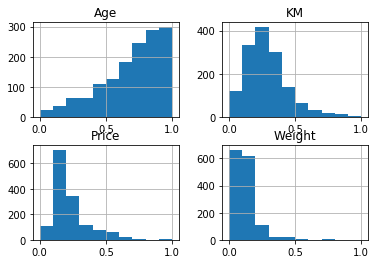

In [13]:
# hist() 메서드는 히스토그램을 줍니다. 
df2.hist()
plt.show()

***

 이번 실습에서는 선형 회귀 분석을 통해 다음에 대해 추정해보도록 하겠습니다.
## <1>예제: 환자의 1년 후 질병 진행의 정도<br>
## <2>연습 문제: 자동차의 가격<br>

(Target : y)

# Simple linear regression(단순 회귀분석)
+ Target 변수에 영향을 미치는 독립변수의 수가 1개일 때를 말합니다.

<center>$Y = B_0 + B_1X_1$

# 2. Scratch로 단순 회귀식 추정하기

Data를 input 데이터(diabetes_X)와 output 데이터(Target, diabetes_Y)로 나눕니다.

(독립변수와 종속변수를 각 1개씩 선택합니다.)

In [14]:
# 컬럼이름으로 다중 컬럼 선택 (return DatFrame)
## 하나의 컬럼을 선택할 경우 Series를 반환
## 하나의 컬럼을 DataFrame으로 반환하기 위해서는 컬럼 리스트로 입력

label = 'bmi'
diabetes_X = df[[label]]
diabetes_Y = df[['y']]

In [15]:
print(diabetes_X.shape)
diabetes_X.head()

(442, 1)


,bmi
0,0.582645
1,0.148760
2,0.516529
3,0.301653
4,0.206612


In [16]:
diabetes_Y.head()

,y
0,0.392523
1,0.155763
2,0.361371
3,0.563863
4,0.342679


### 1) 데이터 분포 그래프로 살펴보기

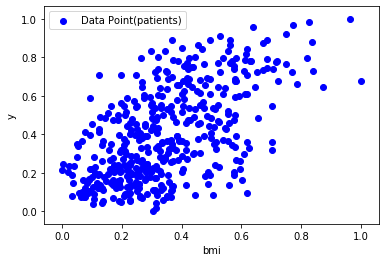

In [17]:
#plot
plt.scatter(diabetes_X, diabetes_Y, color='blue', label='Data Point(patients)')

# x축 label
plt.xlabel(label)

# y축 label
plt.ylabel('y')
plt.legend()# 범례
plt.show()

### 2) 회귀식 추정하기

## \* Least squares method(최소제곱법)

### minRSS 
### = min$\sum_{i=1}^n \ {e_i^2}$
### = min$\sum_{i=1}^n ({y_i - \hat{y_i}})^2$
### = min$\sum_{i=1}^n ({y_i - \hat{\beta_0} - \hat{\beta_1}x_i})^2$

### \- $ \hat{\beta_0}$ \& $\hat{\beta_1}$는 어떻게 찾는가?

Convex function 이므로 미분을 통해 최소값을 계산합니다.

### \< Explicit solution \>
### $\hat{\beta_1} = \frac{\sum_{i=1}^n {(X_i-\bar{X_i})*(Y_i-\bar{Y})}}{\sum_{i=1}^n ({X_i-\bar{X_i}})^2}$

### $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}*\beta_1 \bar{X}$

In [18]:
# inputs 과 outputs 변수(X, Y) 초기화
X = diabetes_X.values.tolist()
Y = diabetes_Y.values.tolist()

# inputs의 평균
x_mean = np.mean(X)

# outputs의 평균
y_mean = np.mean(Y)

# input의 총 수
n = len(X)

# 모델 파라미터 b1, b0 계산
numerator = 0 #분자
denominator = 0 #분모
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2 # ** : 제곱
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

# 모델 파라미터 출력
print('b1:',b1)
print('bo:',b0)
print('y=',b0[0],'+',b1[0],' * x')

b1: [0.77146948]
bo: [0.1290434]
y= 0.12904339907695844 + 0.7714694766783862  * x


### 3) 결과 살펴보기

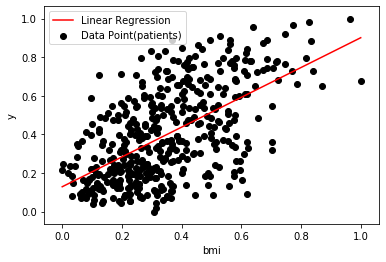

In [19]:
# plot

x_max = np.max(X)
x_min = np.min(X)

# 회귀식으로 데이터의 결과 추정위한 샘플 데이터(test)
x = np.linspace(x_min, x_max, 1000)

# 회귀식으로 데이터의 결과 추정
y = b0 + b1 * x

# 회귀 결과 plot
plt.plot(x, y, color='red', label='Linear Regression')

# 데이터 좌표 plot
plt.scatter(X, Y, color='black', label='Data Point(patients)')

# x축 label
plt.xlabel(label)

# y축 label
plt.ylabel('y')
plt.legend()
plt.show()

### 4) 평가하기

### \- 모델이 주어진 데이터에 얼마나 적합한가?

\* Root Mean Squared Error(RMSE)



+ 각 점들과 직선과의 거리 제곱 평균의 제곱근
+ ### $RMSE = \sqrt{\sum_{i=1}^m \frac{1}{m}{(\hat{y_i}-y_i)^2}}$

Mean Squared Error(MSE): 추정값$(\hat{y_i})$과 실제값$(y_i)$의 차이의 제곱의 평균
+ 분산( 평균과 실제값의 차이의 제곱의 평균 )과 유사

In [20]:
# input 총 수
n = len(X)

rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

[0.19431005]


\* $R^2$ scrore (결정 계수)

+ 종속 변수의 총 변화량 중 모델(추정된 회귀식)로 설명 가능한 부분(변화량)의 비율을 의미합니다.

![R2](./Images/R2.png)


SST : sum of squares total(모든 개체가 가지는 총 변화량)

SSR : sum of squares residuals (총 변화량 중 회귀식으로 설명 가능한 변화량)

SSE : sum of squares error(총 변화량 중 회귀식으로는 설명 불가능한 변화량)

(즉, SST = SSR + SSE)

+ ### $R^2 = \frac{SSR}{SST} = \frac{\sum(\hat{y_i}-\bar{y})^2}{\sum(y_i-\bar{y})^2}$

  ###  $= 1 - \frac{SSE}{SST} = 1 - \frac{\sum({y_i}-\hat{y})^2}{\sum(y_i-\bar{y})^2}$


$0<R^2<1$ : 1에 가까울수록 높은 설명력을 보인다고 할 수 있습니다.

$R^2 = 1$

:the regression model fits perfectly

$R^2 = 0$

:the regression model does not explain anything about the relationship between X and Y

![RegrR^2](./Images/RegrR%5E2.png)

In [21]:
sumofsquares = 0
sumofresiduals = 0
# input의 총 수
n = len(X)

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.34392376]


+ 계산된 $R^2$값이 약 0.343 이므로 모델은 어느 정도 데이터에 적합하지만 다른 중요한 요소가 존재한다는 것을 의미합니다.

# 3. Scikit-learn으로 단순 회귀식 추정하기

## <1> 예제

### 2) 회귀식 추정하기

+ 앞서 언급한 모델 파라미터 추정을 scikit-learn에서는 estimator(추정기)라는 객체를 기반으로 합니다. 추정 자체는 fit() 메서드에 의해 수행됩니다.

다음은 선형 회귀를 위한 LinearRegression 추정기 입니다.

In [22]:
# 선형회귀 추정기 생성
lr = linear_model.LinearRegression() 

fit() 메서드를 통해 모델 파라미터를 추정합니다.

In [23]:
# input 대해 선형 회귀(모델 파라미터 추정)
lr.fit(diabetes_X, diabetes_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[0.77146948]]
[0.1290434]


In [25]:
# 모델 파라미터 출력
print('Model parameters: \n')
print('b1:', lr.coef_[0,0])
print('b0:', lr.intercept_[0])
print()
print('y=',lr.intercept_[0],'+',lr.coef_[0,0],'* x')

Model parameters: 

b1: 0.7714694766783854
b0: 0.12904339907695872

y= 0.12904339907695872 + 0.7714694766783854 * x


계산된 모델 파라미터를 적용하여 데이터 세트에 대해 추정값을 반환합니다.

### 3) 결과 살펴보기

In [26]:
# 회귀식으로 데이터의 결과 추정
diabetes_y_pred = lr.predict(diabetes_X)

In [27]:
type(diabetes_y_pred)

numpy.ndarray

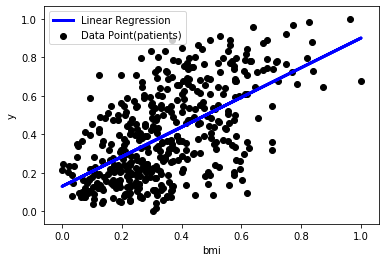

In [28]:
# Plot
# 회귀식으로 데이터의 결과 추정위한 샘플 데이터(test)
X = np.array(diabetes_X.values.tolist())

# 데이터 좌표 plot
plt.scatter(diabetes_X, diabetes_Y,  color='black', label='Data Point(patients)')

# 회귀 결과 plot
plt.plot(X, diabetes_y_pred, color='blue', linewidth=3, label='Linear Regression')

# x축 label
plt.xlabel(label)

#y축 label
plt.ylabel('y')
plt.legend()
plt.show()

### 4) 평가하기

In [29]:
# R2 scroe
print('R2 score: %.2f' % r2_score(diabetes_Y, diabetes_y_pred))

R2 score: 0.34


***

## <2> 연습문제

Data를 input 데이터와 output 데이터(Target)로 나눕니다.

(독립변수와 종속변수를 각 1개씩 선택합니다.)

In [30]:
# 컬럼이름으로 다중 컬럼 선택 (return DatFrame)
## 하나의 컬럼을 선택할 경우 Series를 반환
## 하나의 컬럼을 DataFrame으로 반환하기 위해서는 컬럼 리스트로 입력

label_test = 'Age'

dfx = df2[[label_test]]
dfy = df2[['Price']]

print(dfx.shape)
dfx.head()

(1436, 1)


,Age
0,0.278481
1,0.278481
2,0.291139
3,0.316456
4,0.367089


In [31]:
dfx.head()

,Age
0,0.278481
1,0.278481
2,0.291139
3,0.316456
4,0.367089


In [32]:
dfy.head()

,Price
0,0.325044
1,0.333925
2,0.341030
3,0.376554
4,0.333925


### 1) 데이터 분포 그래프로 살펴보기

데이터 점을 산점도 그래프로 나타냅니다.

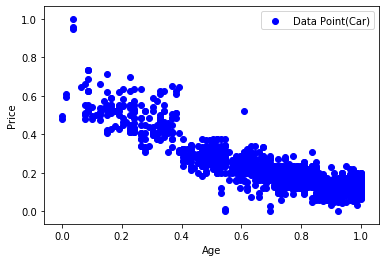

In [33]:
#plot
plt.scatter(dfx, dfy, color='blue', label='Data Point(Car)')

# x축 label
plt.xlabel(label_test)

# y축 label
plt.ylabel('Price')
plt.legend()# 범례
plt.show()

### 2) 회귀식 추정하기(by sklearn)

모델 파라미터를 계산하여 출력하고, 데이터에 대해서 회귀 결과를 얻습니다.

In [34]:
# 선형회귀 추정기 생성
lrt1 = linear_model.LinearRegression()

# input 대해 선형 회귀(모델 파라미터 추정)
lrt1.fit(dfx, dfy)

# 모델 파라미터 출력
print('Model parameters: \n')
print('b1:', lrt1.coef_[0,0])
print('b0:', lrt1.intercept_[0])
print()
print('y=',lrt1.intercept_[0],'+',lrt1.coef_[0,0],'* x')

# 회귀식으로 데이터의 결과 추정
dfy_pred = lrt1.predict(dfx)

Model parameters: 

b1: -0.4797070414405784
b0: 0.5603241585865362

y= 0.5603241585865362 + -0.4797070414405784 * x


### 3) 결과 살펴보기
결과를 그래프로 나타냅니다.

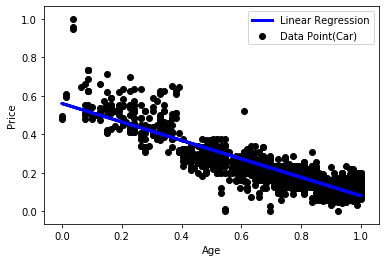

In [35]:
# Plot
# 회귀식으로 데이터의 결과 추정위한 샘플 데이터(test)
X =np.array(dfx.values.tolist())

# 데이터 좌표 plot
plt.scatter(dfx, dfy,  color='black', label='Data Point(Car)')

# 회귀 결과 plot
plt.plot(X, dfy_pred, color='blue', linewidth=3, label='Linear Regression')

# x축 label
plt.xlabel(label_test)

#y축 label
plt.ylabel('Price')
plt.legend()
plt.show()

### 4) 평가하기
R2를 이용하여 테스트 결과를 평가합니다.

In [36]:
# R2 scroe
print('R2 score: %.2f' % r2_score(dfy, dfy_pred))

R2 score: 0.77


***

# Multiple regression (다중 회귀분석)

+ Target 변수에 영향을 미치는 독립변수의 수가 d개일 때를 말합니다.

<center>$Y = B_0 + B_1X_1 + B_2X_2+ \cdot\cdot\cdot B_dX_d$

# 3. Scikit-learn으로 다중 회귀식 추정하기

## <1> 예제

Data를 input 데이터(diabetes_X_multi)와 output 데이터(Target, diabetes_Y_multi)로 나눕니다.

(독립변수 2개와 종속변수 1개를 선택합니다.)

In [37]:
# 컬럼이름으로 다중 컬럼 선택 (return DatFrame)
## 하나의 컬럼을 선택할 경우 Series를 반환
## 하나의 컬럼을 DataFrame으로 반환하기 위해서는 컬럼 리스트로 입력

label2 = ['bmi', 'tch']
diabetes_X_multi = df[label2]
diabetes_Y_multi = df[['y']]

### 1) 데이터 분포 그래프로 살펴보기


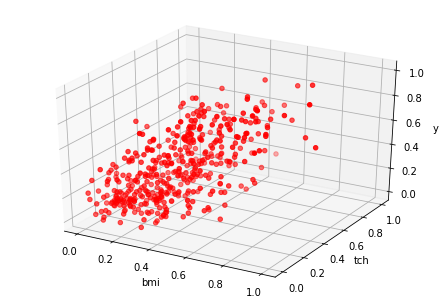

In [38]:
# Plot

# x,y축 값 설정 (독립변수)
bmi = diabetes_X_multi[['bmi']]
tch = diabetes_X_multi[['tch']]

fig = plt.figure()
ax = Axes3D(fig)

# 산점도 그래프
ax.scatter(bmi, tch, diabetes_Y_multi, color='red')

# x축 label
ax.set_xlabel('bmi')

# y축 label
ax.set_ylabel('tch')

# z축 label
ax.set_zlabel('y')
plt.show()

### 2) 회귀식 추정하기

 다음은 선형 회귀를 위한 LinearRegression 추정기 입니다.

In [39]:
# 선형회귀 추정기 생성
lr2 = linear_model.LinearRegression()

fit() 메서드를 통해 모델 파라미터를 추정합니다.

In [40]:
# input 대해 선형 회귀(모델 파라미터 추정)
lr2.fit(diabetes_X_multi, diabetes_Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# 모델 파라미터 출력
print('Model parameters: \n')
print('b2:', lr2.coef_[0,0])
print('b1:', lr2.coef_[0,1])
print('b0:', lr2.intercept_[0])
print()
print('y=',lr2.intercept_[0],'+',lr2.coef_[0,1],'*x1 + ', lr2.coef_[0,0], '*x2')

Model parameters: 

b2: 0.6481322714794128
b1: 0.2989675524781938
b0: 0.08443406979018608

y= 0.08443406979018608 + 0.2989675524781938 *x1 +  0.6481322714794128 *x2


계산된 모델 파라미터를 적용하여 데이터 세트에 대해 추정값을 반환합니다.

In [42]:
diabetes_y_pred_multi = lr2.predict(diabetes_X_multi)

### 3) 결과 살펴보기

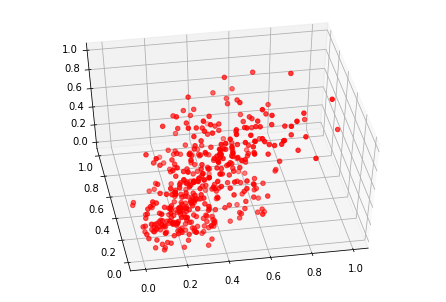

In [43]:
# Plot

# x,y축 값 설정 (독립변수)
bmi = diabetes_X_multi[['bmi']]
tch = diabetes_X_multi[['tch']]

diabetes_y_pred_multi = lr2.predict(diabetes_X_multi)

# matplotlib 3d plot
fig = plt.figure()
ax = Axes3D(fig, azim= -100, elev=50) #azim : 방위각도, azim : 고도 
ax.scatter(bmi, tch, diabetes_Y_multi, color='red')


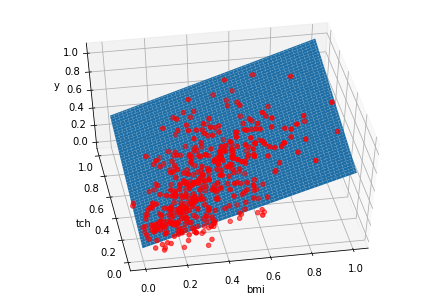

In [44]:
# Plot

# 회귀식으로 데이터의 결과 추정위한 샘플 데이터(test)
bmi = diabetes_X_multi[['bmi']]
tch = diabetes_X_multi[['tch']]
xx1, xx2 = np.meshgrid(np.linspace(diabetes_X_multi.bmi.min(),
                                   diabetes_X_multi.bmi.max(), 100), 
                       np.linspace(diabetes_X_multi.tch.min(), 
                                   diabetes_X_multi.tch.max(), 100))
# matplotlib 3d plot
fig = plt.figure()
ax = Axes3D(fig, azim= -100, elev=50) #azim : 방위각도, azim : 고도 
ax.scatter(bmi, tch, diabetes_Y_multi, color='red')


# 회귀식으로 결과(hyperplane) 추정
Z =lr2.intercept_[0] +lr2.coef_[0,0] * xx1 + lr2.coef_[0,1] * xx2

# plot hyperplane
ax.plot_surface(xx1,xx2,Z)
ax.set_xlabel('bmi')
ax.set_ylabel('tch')
ax.set_zlabel('y')

plt.show()

### 4) 평가하기

+ 총변화량(SST) 중에서 회귀직선에 의해 설명되는 변화량(SSR)의 비율은 독립변수의 수가 증가하면 따라서 커지는 증가함수 형태입니다.(독립변수의 개수에 의존)

\* $R_{adj}^2$ scrore (수정된 결정 계수)

+ 즉, 일반 $R^2$는 활용된 독립변수의 수에 민감하게 작용하므로, 독립변수의 수만큼 감소 시켜주는 방식의 수정된 $R^2$ score가 지표로 활용됩니다.


+ ### $R_{adj}^2 = 1 - [\frac{n-1}{n-(p+1)}]\frac{SSE}{SST}$
(결정계수보다 항상 작은것이 특징)

In [45]:
# R2 scroe
R2 = r2_score(diabetes_Y_multi, diabetes_y_pred_multi)
print('R2 score: %.2f' % R2)

R2 score: 0.39


In [46]:
# adj R2 score
n = len(diabetes_X_multi)
p = len(label)

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adj R2 score: %.2f' % Adj_r2)

Adj R2 score: 0.38


+ 계산된 $Adj \ R^2$값이 0.38 이므로 모델은 단순 모델보다 더 좋은 설명력을 보임을 의미합니다.

---

## <2> 연습문제

Data를 input 데이터와 output 데이터로 나눕니다.

(독립변수 2개와 종속변수 1개를 선택합니다.)

In [47]:
# 컬럼이름으로 다중 컬럼 선택 (return DatFrame)
## 하나의 컬럼을 선택할 경우 Series를 반환
## 하나의 컬럼을 DataFrame으로 반환하기 위해서는 컬럼 리스트로 입력

labelt2 = ['Age', 'KM']
dfx_multi = df2[labelt2]
dfy_multi = df2[['Price']]

In [48]:
dfx_multi.head()

,Age,KM
0,0.278481,0.193355
1,0.278481,0.300149
2,0.291139,0.171647
3,0.316456,0.197528
4,0.367089,0.158433


In [49]:
dfy_multi.head()

,Price
0,0.325044
1,0.333925
2,0.341030
3,0.376554
4,0.333925


### 1) 데이터 분포 그래프로 살펴보기

데이터 점을 산점도 그래프로 나타냅니다.

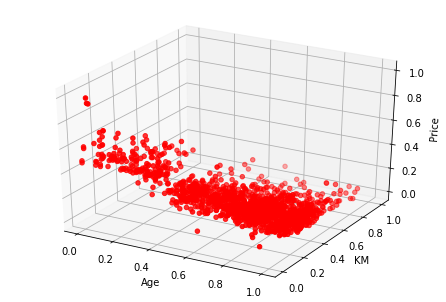

In [50]:
# Plot

# x,y축 값 설정 (독립변수)
age = dfx_multi[['Age']]
km = dfx_multi[['KM']]

# figure
fig = plt.figure()
ax = Axes3D(fig)

# 산점도 그래프
ax.scatter(age, km, dfy_multi, color='red')

# x축 label
ax.set_xlabel('Age')

# y축 label
ax.set_ylabel('KM')

# z축 label
ax.set_zlabel('Price')
plt.show()

### 2) 회귀식 추정하기(by sklearn)

모델 파라미터를 계산하여 출력하고, test 데이터에 대해서 회귀 결과를 얻습니다.

In [51]:
# 선형회귀 추정기 생성
lrt2 = linear_model.LinearRegression() 

# input 대해 선형 회귀(모델 파라미터 추정)
lrt2.fit(dfx_multi, dfy_multi)

# 모델 파라미터 출력
print('Model parameters: \n')
print('b2:', lrt2.coef_[0,0])
print('b1:', lrt2.coef_[0,1])
print('b0:', lrt2.intercept_[0])
print()
print('y=',lrt2.intercept_[0],'+',lrt2.coef_[0,1],'*x1 + ', lrt2.coef_[0,0], '*x2')

# 회귀식으로 데이터의 결과 추정
dfy_pred = lrt2.predict(dfx_multi)

Model parameters: 

b2: -0.43260338342709304
b1: -0.1420920218110332
b0: 0.5676358043650112

y= 0.5676358043650112 + -0.1420920218110332 *x1 +  -0.43260338342709304 *x2


### 3) 결과 살펴보기
결과를 그래프로 나타냅니다.

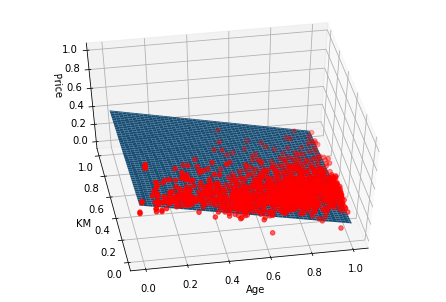

In [52]:
# Plot

# 회귀식으로 데이터의 결과 추정위한 샘플 데이터(test)
age = dfx_multi[['Age']]
km = dfx_multi[['KM']]
xxt1, xxt2 = np.meshgrid(np.linspace(dfx_multi.Age.min(),
                                   dfx_multi.Age.max(), 100), 
                       np.linspace(dfx_multi.KM.min(), 
                                   dfx_multi.KM.max(), 100))
# matplotlib 3d plot
fig = plt.figure()
ax = Axes3D(fig, azim= -100, elev=50) #azim : 방위각도, azim : 고도 
ax.scatter(age, km, dfy_multi, color='red')

# 회귀식으로 결과 추정
Z =lrt2.intercept_[0] +lrt2.coef_[0,0] * xxt1 + lrt2.coef_[0,1] * xxt2

# plot hyperplane
ax.plot_surface(xxt1,xxt2,Z)
ax.set_xlabel('Age')
ax.set_ylabel('KM')
ax.set_zlabel('Price')

plt.show()

### 4) 평가하기
R2를 이용하여 테스트 결과를 평가합니다.

In [53]:
# R2 scroe
R2 = r2_score(dfy_multi, dfy_pred)
print('R2 score: %.2f' % R2)

R2 score: 0.79


In [54]:
# adj R2 score
n = len(dfy_multi)
p = len(labelt2)

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adj R2 score: %.2f' % Adj_r2)

Adj R2 score: 0.79


(표본의 크기와 독립변수의 수를 고려하는 $Adj \ R^2$와 $R^2$는 표본이 큰 경우 거의 동일해짐을 확인할 수 있습니다.)

---

## 번외1
scikit-learn 패키지가 아닌  numpy 또는  statsmodels의 OLS 명령을 통해서도 회귀분석이 가능합니다.

### 단순선형회귀의 경우 결과값 (feat. statsmodels)
![RegrResults](./Images/regression_results.png)
  
  ***
###  다변량 선형회귀의 경우 결과값 (feat. statsmodels)
![RegrResults2](./Images/regression_results2.png)

***

## 번외2

### 다중공선성과 변수 선택
  
  
  - 다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우입니다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생하며 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해합니다.
  > 독립변수가 서로 의존하게 되면 이렇게 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해칠 가능성이 높아집니다. 이를 방지하는 방법들은 다음과 같습니다.
>
>* 변수 선택법으로 의존적인 변수 삭제
>* PCA(principal component analysis) 방법으로 의존적인 성분 삭제
>* 정규화(regularized) 방법 사용

## VIF

다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있습니다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것으로. $i$번째 변수의 VIF는 다음과 같이 계산하게됩니다.

$$ \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2} $$

여기에서 $R^2_i$는 다른 변수로 $i$번째 변수를 선형회귀한 성능(결정 계수)이다. 다른 변수에 의존적일 수록 VIF가 커지게 됩니다.  

일반적으로  VIF가 5 이상인 경우 다중공선성이 존재한다고 생각할 수 있으며, 10이 넘으면 문제가 심각한 것으로 보고 이에 따른 핸들링이 필요합니다.

StatsModels에서는 `variance_inflation_factor` 명령으로 VIF를 계산할 수 있습니다.

![vif](./Images/vif.png)

***

# ** 설명력을 높여보자 **

## 2) 연습문제

### \- sklearn을 활용하여 설명력이 높은 회귀식을 찾아보세요.

In [55]:
df2 = pd.read_csv(join('data', 'ToyotaDataset.csv'))

In [56]:
df2.head()

,Price,Age,KM,Weight
0,13500,0.278481,0.193355,0.268293
1,13750,0.278481,0.300149,0.268293
2,13950,0.291139,0.171647,0.268293
3,14950,0.316456,0.197528,0.268293
4,13750,0.367089,0.158433,0.276423


In [57]:
df2.columns

Index(['Price', 'Age', 'KM', 'Weight'], dtype='object')

In [58]:
newlabel = ['Age']

dfx = df2[newlabel]
dfy = df2[['Price']]

print(dfx.shape)

(1436, 1)


### regression

In [60]:
# 해설용 sample code 

## 선형회귀 추정기 생성
lr3 = linear_model.LinearRegression()

## input 대해 선형 회귀(모델 파라미터 추정)
lr3.fit(dfx, dfy)

## 모델 파라미터 출력
print('Model parameters: \n')

rgstr = ''
for i in range(len(lr3.coef_[0])):
    print("b%d" %(len(lr3.coef_[0])-i),": ", "%f" %lr3.coef_[0,i])
    rgstr = ' + '+repr(lr3.coef_[0,i]) + '*x'+repr(len(lr3.coef_[0])-i) + rgstr

print('b0:', lr3.intercept_[0])
print()
rgstr = repr(lr3.intercept_[0]) + rgstr
print('y = ', rgstr)

Model parameters: 

b1 :  -13503.753217
b0: 20123.125064210995

y =  20123.125064210995 + -13503.753216552286*x1


### evaluation

In [ ]:
# 해설용 sample code 
#y_pred = lr3.predict(X_test)
# n = len(X_test)
# p = len(label2)

# R2 = r2_score(y_test, y_pred)
# Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

# print('Adj R2 score: %.2f' %  Adj_r2)

In [61]:
import itertools

f2 = pd.read_csv(join('data', 'ToyotaDataset.csv'))

newlabel = ['Age', 'KM', 'Weight']
combs = []

for i in range(1, len(newlabel)+1):
    els = [list(x) for x in itertools.combinations(newlabel, i)]
    combs.extend(els) # list 원소만을 append(일반적인 append는 list 자체를 추가한다.)
for i in range(len(combs)):
    print('label', combs[i])

    dfx = df2[combs[i]]
    dfy = df2[['Price']]
    print(dfx.shape)

    # 선형회귀 추정기 생성
    lr3 = linear_model.LinearRegression()

    # input 대해 선형 회귀(모델 파라미터 추정)
    lr3.fit(dfx, dfy)

    # 모델 파라미터 출력
    print('Model parameters: \n')
    rgstr = ''
    for i in range(len(lr3.coef_[0])):
        print("b%d" %(len(lr3.coef_[0])-i),": ", "%f" %lr3.coef_[0,i])
        rgstr = ' + '+repr(lr3.coef_[0,i]) + '*x'+repr(len(lr3.coef_[0])-i) + rgstr

    print('b0:', lr3.intercept_[0])
    print()
    rgstr = repr(lr3.intercept_[0]) + rgstr
    print('y = ', rgstr)

    y_pred = lr3.predict(dfx)
    n = len(dfx)
    p = len(combs[i])

    R2 = r2_score(dfy, y_pred)
    Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

    print('Adj R2 score: %.2f' %  Adj_r2)
    print('**************************************************************')

label ['Age']
(1436, 1)
Model parameters: 

b1 :  -13503.753217
b0: 20123.125064210995

y =  20123.125064210995 + -13503.753216552286*x1
Adj R2 score: 0.77
**************************************************************
label ['KM']
(1436, 1)
Model parameters: 

b1 :  -13393.261784
b0: 14508.084893944997

y =  14508.084893944997 + -13393.261784167173*x1
Adj R2 score: 0.32
**************************************************************
label ['Weight']
(1436, 1)
Model parameters: 

b1 :  24627.317537
b0: 7829.221543426506

y =  7829.221543426506 + 24627.317537270323*x1
Adj R2 score: 0.34
**************************************************************
label ['Age', 'KM']
(1436, 2)
Model parameters: 

b2 :  -12177.785243
b1 :  -3999.890414
b0: 20328.947892875065

y =  20328.947892875065 + -3999.8904139805886*x1 + -12177.78524347267*x2
Adj R2 score: 0.79
**************************************************************
label ['Age', 'Weight']
(1436, 2)
Model parameters: 

b2 :  -11932.090104
b1 

---

### Reference

+ Dataset 
#### < diabetesDataset >
Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

#### 데이터 사이언스 스쿨 강의 자료
- 선형 회귀분석의 기초
- 다중공선성과 변수 선택

#### 다중공선성 출력 자료 출처:
- kaggle kernel- Explore Data & Linear Regression  
https://www.kaggle.com/fkstepz/explore-data-linear-regression